# hicstuff API demo

All steps of hicstuff pipeline and downstream operations can be ran using the python api. The matrix can be generated directly from the reads, just like in the command line or by doing each step separately for fine control.


## Data preparation
If using minimap2, the genome can be in fasta format. If using bowtie2, it must be indexed using bowtie2-build:
```bash
bowtie2-build genome.fasta genome
```
The input reads can be in fastq format, or if already aligned to the genome in SAM/BAM format. The pipeline also accepts input in the form of pairs file. The input format is specified using the `start_stage` argument (fastq/sam/pairs/pairs_idx).

## Full pipeline using the API
The hicstuff.pipeline submodule allows to run all steps at one, in a way identical to the hicstuff pipeline command. Here we assume the reads have been aligned and converted to a pairs file already by specifying `start_stage='pairs'`, but it is also possible to give fastq files or sam files as input by specifying `start_stage='fastq'` or `start_stage='sam'`.

In [4]:
import hicstuff.pipeline as hpi


hpi.full_pipeline(input1='../../test_data/valid.pairs', 
                  input2=None, 
                  genome='../../test_data/genome/seq', 
                  enzyme="DpnII",
                  filter_events=True, 
                  pcr_duplicates=True, 
                  start_stage='pairs')


INFO :: ## hicstuff: v1.2.17 log file
INFO :: ## date: 2019-04-24 16:59:28
INFO :: ## enzyme: DpnII
INFO :: ## input1: ../../test_data/valid.pairs 
INFO :: ## input2: None
INFO :: ## ref: ../../test_data/genome/seq
INFO :: ---
INFO :: Filtering with thresholds: uncuts=6 loops=5
INFO :: Proportion of inter contacts: 1.97% (intra: 298, inter: 6)
INFO :: 9696 pairs discarded: Loops: 31, Uncuts: 9663, Weirds: 2
INFO :: 304 pairs kept (3.04%)
INFO :: 0% PCR duplicates have been filtered out (0 / 304 pairs) 
INFO :: 304 pairs used to build a contact map of 564 bins with 304 nonzero entries.
INFO :: Contact map generated after 0h 0m 1s


## Visualise output files

The temporary pairs files can be used to visualise the probability of contacts over genomic distance (distance law). Functions in the view module can also be used to generate visualisations of the results. The utilities in the hicstuff module are handy to transform the matrix.

<IPython.core.display.Javascript object>


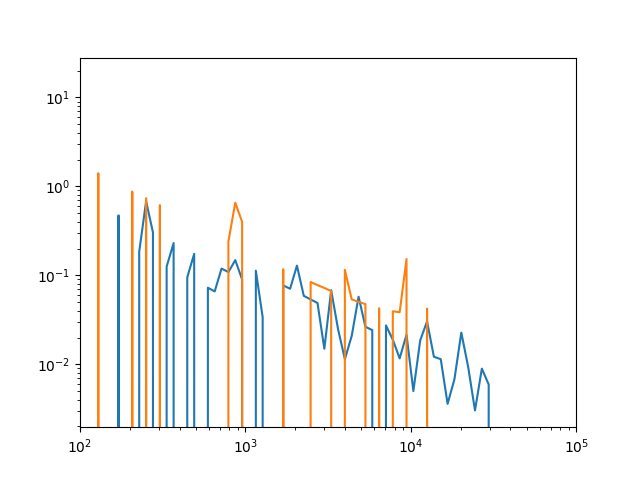

(100, 99578.6959155289)

In [31]:
# TODO: Use a real dataset and download at build time
%matplotlib notebook
import hicstuff.distance_law as hdl
from matplotlib import pyplot as plt
reload(hdl)
xs, ps = hdl.get_distance_law('../../test_data/valid_idx_filtered.pairs', '../../test_data/fragments_list.txt')
ps = hdl.normalize_distance_law(xs, ps)
for i in range(len(xs)):
    plt.loglog(xs[i], ps[i])
plt.xlim(100)

<IPython.core.display.Javascript object>


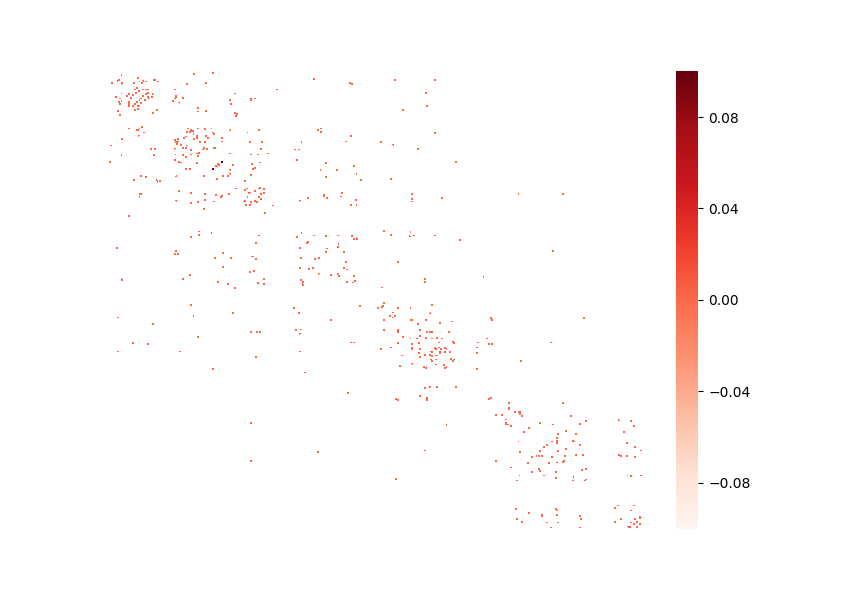

In [39]:
from hicstuff import hicstuff as hcs
import hicstuff.view as hcv
import hicstuff.io as hio
import numpy as np
sparse_mat = hio.load_sparse_matrix('abs_fragments_contacts_weighted.txt')
dense_mat = hcv.sparse_to_dense(sparse_mat)
hcv.plot_matrix(np.log(dense_mat))